# Exploration of house data from Arizona state

This dataset has 5000 observations and 16 variables which contains information about houses built in Arizona state in US. This dataset is quite challenging to process for modelling due to lack of metadata such as no description about data and fields in the data. There are some missing value in the dataset. In exploration, I worked on finding different relationship amonge the features. 

There are few major parts of this notebook that are outlined as following:

a.) Data input

b.) Dealing with missing values

c.) Exploratory Data Analysis



In [45]:
# Impport the packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import folium
import nbconvert


## Data input

In [4]:
# Read the data
data = pd.read_csv('raw_house_data.csv')

In [5]:
# # Display the few rows of the data
data.head(5)

MLS  sold_price  zipcode   longitude   latitude  lot_acres     taxes  \
0  21530491   5300000.0    85637 -110.378200  31.356362    2154.00   5272.00   
1  21529082   4200000.0    85646 -111.045371  31.594213    1707.00  10422.36   
2   3054672   4200000.0    85646 -111.040707  31.594844    1707.00  10482.00   
3  21919321   4500000.0    85646 -111.035925  31.645878     636.67   8418.58   
4  21306357   3411450.0    85750 -110.813768  32.285162       3.21  15393.00   

   year_built  bedrooms bathrooms sqrt_ft garage  \
0        1941        13        10   10500      0   
1        1997         2         2    7300      0   
2        1997         2         3    None   None   
3        1930         7         5    9019      4   
4        1995         4         6    6396      3   

                                    kitchen_features fireplaces  \
0            Dishwasher, Freezer, Refrigerator, Oven          6   
1                       Dishwasher, Garbage Disposal          5   
2         Dishwasher, Garbage Disposal, Refrigerator          5   
3  Dishwasher, Double Sink, Pantry: Butler, Refri...          4   
4  Dishwasher, Garbage Disposal, Refrigerator, Mi...          5   

                 floor_covering   HOA  
0            Mexican Tile, Wood     0  
1          Natural Stone, Other     0  
2    Natural Stone, Other: Rock  None  
3  Ceramic Tile, Laminate, Wood  None  
4              Carpet, Concrete    55

In [6]:
# Check the dimensions of the data
data.shape

(5000, 16)

In [7]:
# show the concise summary about data and count missing values in the dataframe
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   MLS               5000 non-null   int64  
 1   sold_price        5000 non-null   float64
 2   zipcode           5000 non-null   int64  
 3   longitude         5000 non-null   float64
 4   latitude          5000 non-null   float64
 5   lot_acres         4990 non-null   float64
 6   taxes             5000 non-null   float64
 7   year_built        5000 non-null   int64  
 8   bedrooms          5000 non-null   int64  
 9   bathrooms         5000 non-null   object 
 10  sqrt_ft           5000 non-null   object 
 11  garage            5000 non-null   object 
 12  kitchen_features  5000 non-null   object 
 13  fireplaces        5000 non-null   object 
 14  floor_covering    5000 non-null   object 
 15  HOA               5000 non-null   object 
dtypes: float64(5), int64(4), object(7)
memory 

In [8]:
# Descriptive statistical meaures
data.describe()

MLS    sold_price       zipcode    longitude     latitude  \
count  5.000000e+03  5.000000e+03   5000.000000  5000.000000  5000.000000   
mean   2.127070e+07  7.746262e+05  85723.025600  -110.912107    32.308512   
std    2.398508e+06  3.185556e+05     38.061712     0.120629     0.178028   
min    3.042851e+06  1.690000e+05  85118.000000  -112.520168    31.356362   
25%    2.140718e+07  5.850000e+05  85718.000000  -110.979260    32.277484   
50%    2.161469e+07  6.750000e+05  85737.000000  -110.923420    32.318517   
75%    2.180480e+07  8.350000e+05  85749.000000  -110.859078    32.394334   
max    2.192856e+07  5.300000e+06  86323.000000  -109.454637    34.927884   

         lot_acres         taxes  year_built     bedrooms  
count  4990.000000  5.000000e+03  5000.00000  5000.000000  
mean      4.661317  9.402828e+03  1992.32800     3.933800  
std      51.685230  1.729385e+05    65.48614     1.245362  
min       0.000000  0.000000e+00     0.00000     1.000000  
25%       0.580000  4.803605e+03  1987.00000     3.000000  
50%       0.990000  6.223760e+03  1999.00000     4.000000  
75%       1.757500  8.082830e+03  2006.00000     4.000000  
max    2154.000000  1.221508e+07  2019.00000    36.000000

In [9]:
# check the duplicate values
data.duplicated().sum()

0

## Dealing with Missing values

In [10]:
# check the missing value in each column
data.isna().sum()

MLS                  0
sold_price           0
zipcode              0
longitude            0
latitude             0
lot_acres           10
taxes                0
year_built           0
bedrooms             0
bathrooms            0
sqrt_ft              0
garage               0
kitchen_features     0
fireplaces           0
floor_covering       0
HOA                  0
dtype: int64

In [11]:
# Replace the nan values from the dataframe
data1 = data.replace(['None'], np.nan)  

In [12]:
# Check few rows of the data
data1.head(3)

MLS  sold_price  zipcode   longitude   latitude  lot_acres     taxes  \
0  21530491   5300000.0    85637 -110.378200  31.356362     2154.0   5272.00   
1  21529082   4200000.0    85646 -111.045371  31.594213     1707.0  10422.36   
2   3054672   4200000.0    85646 -111.040707  31.594844     1707.0  10482.00   

   year_built  bedrooms bathrooms sqrt_ft garage  \
0        1941        13        10   10500      0   
1        1997         2         2    7300      0   
2        1997         2         3     NaN    NaN   

                             kitchen_features fireplaces  \
0     Dishwasher, Freezer, Refrigerator, Oven          6   
1                Dishwasher, Garbage Disposal          5   
2  Dishwasher, Garbage Disposal, Refrigerator          5   

               floor_covering  HOA  
0          Mexican Tile, Wood    0  
1        Natural Stone, Other    0  
2  Natural Stone, Other: Rock  NaN

In [13]:
# fill the missing value in column HOA with 0
data1['HOA'].fillna(0, inplace = True)


In [14]:
# check the missing values in each column
data1.isna().sum()

MLS                  0
sold_price           0
zipcode              0
longitude            0
latitude             0
lot_acres           10
taxes                0
year_built           0
bedrooms             0
bathrooms            6
sqrt_ft             56
garage               7
kitchen_features    33
fireplaces           0
floor_covering       1
HOA                  0
dtype: int64

In [15]:
# Delete all missing values from the dataframe
data2 = data1.dropna()
data2 = data2.drop(data2[data2['year_built']==0].index)
data2.head()

MLS  sold_price  zipcode   longitude   latitude  lot_acres     taxes  \
0  21530491   5300000.0    85637 -110.378200  31.356362    2154.00   5272.00   
1  21529082   4200000.0    85646 -111.045371  31.594213    1707.00  10422.36   
3  21919321   4500000.0    85646 -111.035925  31.645878     636.67   8418.58   
4  21306357   3411450.0    85750 -110.813768  32.285162       3.21  15393.00   
5  21528016   3250000.0    85718 -110.910593  32.339090       1.67  27802.84   

   year_built  bedrooms bathrooms sqrt_ft garage  \
0        1941        13        10   10500      0   
1        1997         2         2    7300      0   
3        1930         7         5    9019      4   
4        1995         4         6    6396      3   
5        1999         3         4    6842      3   

                                    kitchen_features fireplaces  \
0            Dishwasher, Freezer, Refrigerator, Oven          6   
1                       Dishwasher, Garbage Disposal          5   
3  Dishwasher, Double Sink, Pantry: Butler, Refri...          4   
4  Dishwasher, Garbage Disposal, Refrigerator, Mi...          5   
5  Dishwasher, Garbage Disposal, Refrigerator, Mi...          5   

                 floor_covering  HOA  
0            Mexican Tile, Wood    0  
1          Natural Stone, Other    0  
3  Ceramic Tile, Laminate, Wood    0  
4              Carpet, Concrete   55  
5    Natural Stone, Wood, Other  422

In [16]:
# To check the missing value again
data2.isna().sum()

MLS                 0
sold_price          0
zipcode             0
longitude           0
latitude            0
lot_acres           0
taxes               0
year_built          0
bedrooms            0
bathrooms           0
sqrt_ft             0
garage              0
kitchen_features    0
fireplaces          0
floor_covering      0
HOA                 0
dtype: int64

In [17]:
# convert the object type in to float type
data2['bathrooms'] = pd.to_numeric(data2['bathrooms'])
data2['garage'] = pd.to_numeric(data2['garage'])
data2['sqrt_ft'] = pd.to_numeric(data2['sqrt_ft'])

In [18]:
# Calculate the sold price per square foot
data2["sold_price_per_sqrt_ft"] = data2["sold_price"]/data2["sqrt_ft"]

#data2.head()

## Exploratory Data Analysis

In [19]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4903 entries, 0 to 4998
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   MLS                     4903 non-null   int64  
 1   sold_price              4903 non-null   float64
 2   zipcode                 4903 non-null   int64  
 3   longitude               4903 non-null   float64
 4   latitude                4903 non-null   float64
 5   lot_acres               4903 non-null   float64
 6   taxes                   4903 non-null   float64
 7   year_built              4903 non-null   int64  
 8   bedrooms                4903 non-null   int64  
 9   bathrooms               4903 non-null   float64
 10  sqrt_ft                 4903 non-null   float64
 11  garage                  4903 non-null   float64
 12  kitchen_features        4903 non-null   object 
 13  fireplaces              4903 non-null   object 
 14  floor_covering          4903 non-null   

C:\Users\01-18-20\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Freq')

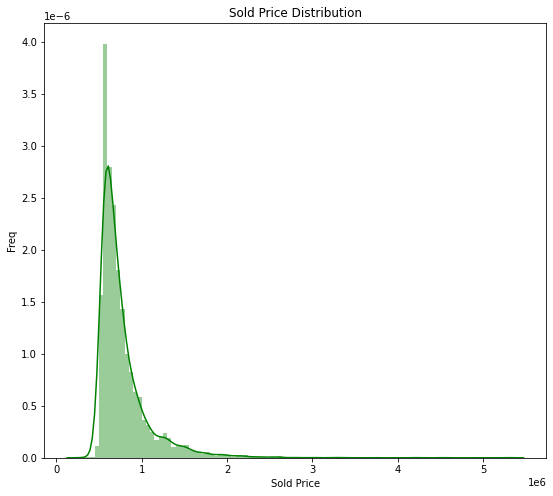

In [20]:
# Disply the distribution of sold price column
plt.figure(figsize=(9, 8))
sns.distplot(data2['sold_price'], color='g', bins=100, hist_kws={'alpha': 0.4});
plt.title('Sold Price Distribution')
plt.xlabel('Sold Price')
plt.ylabel('Freq')

With this information we can see that the prices are skewed right and some outliers lies above ~3,000,000.

(array([-500.,    0.,  500., 1000., 1500.]), [])

<Figure size 1152x864 with 0 Axes>

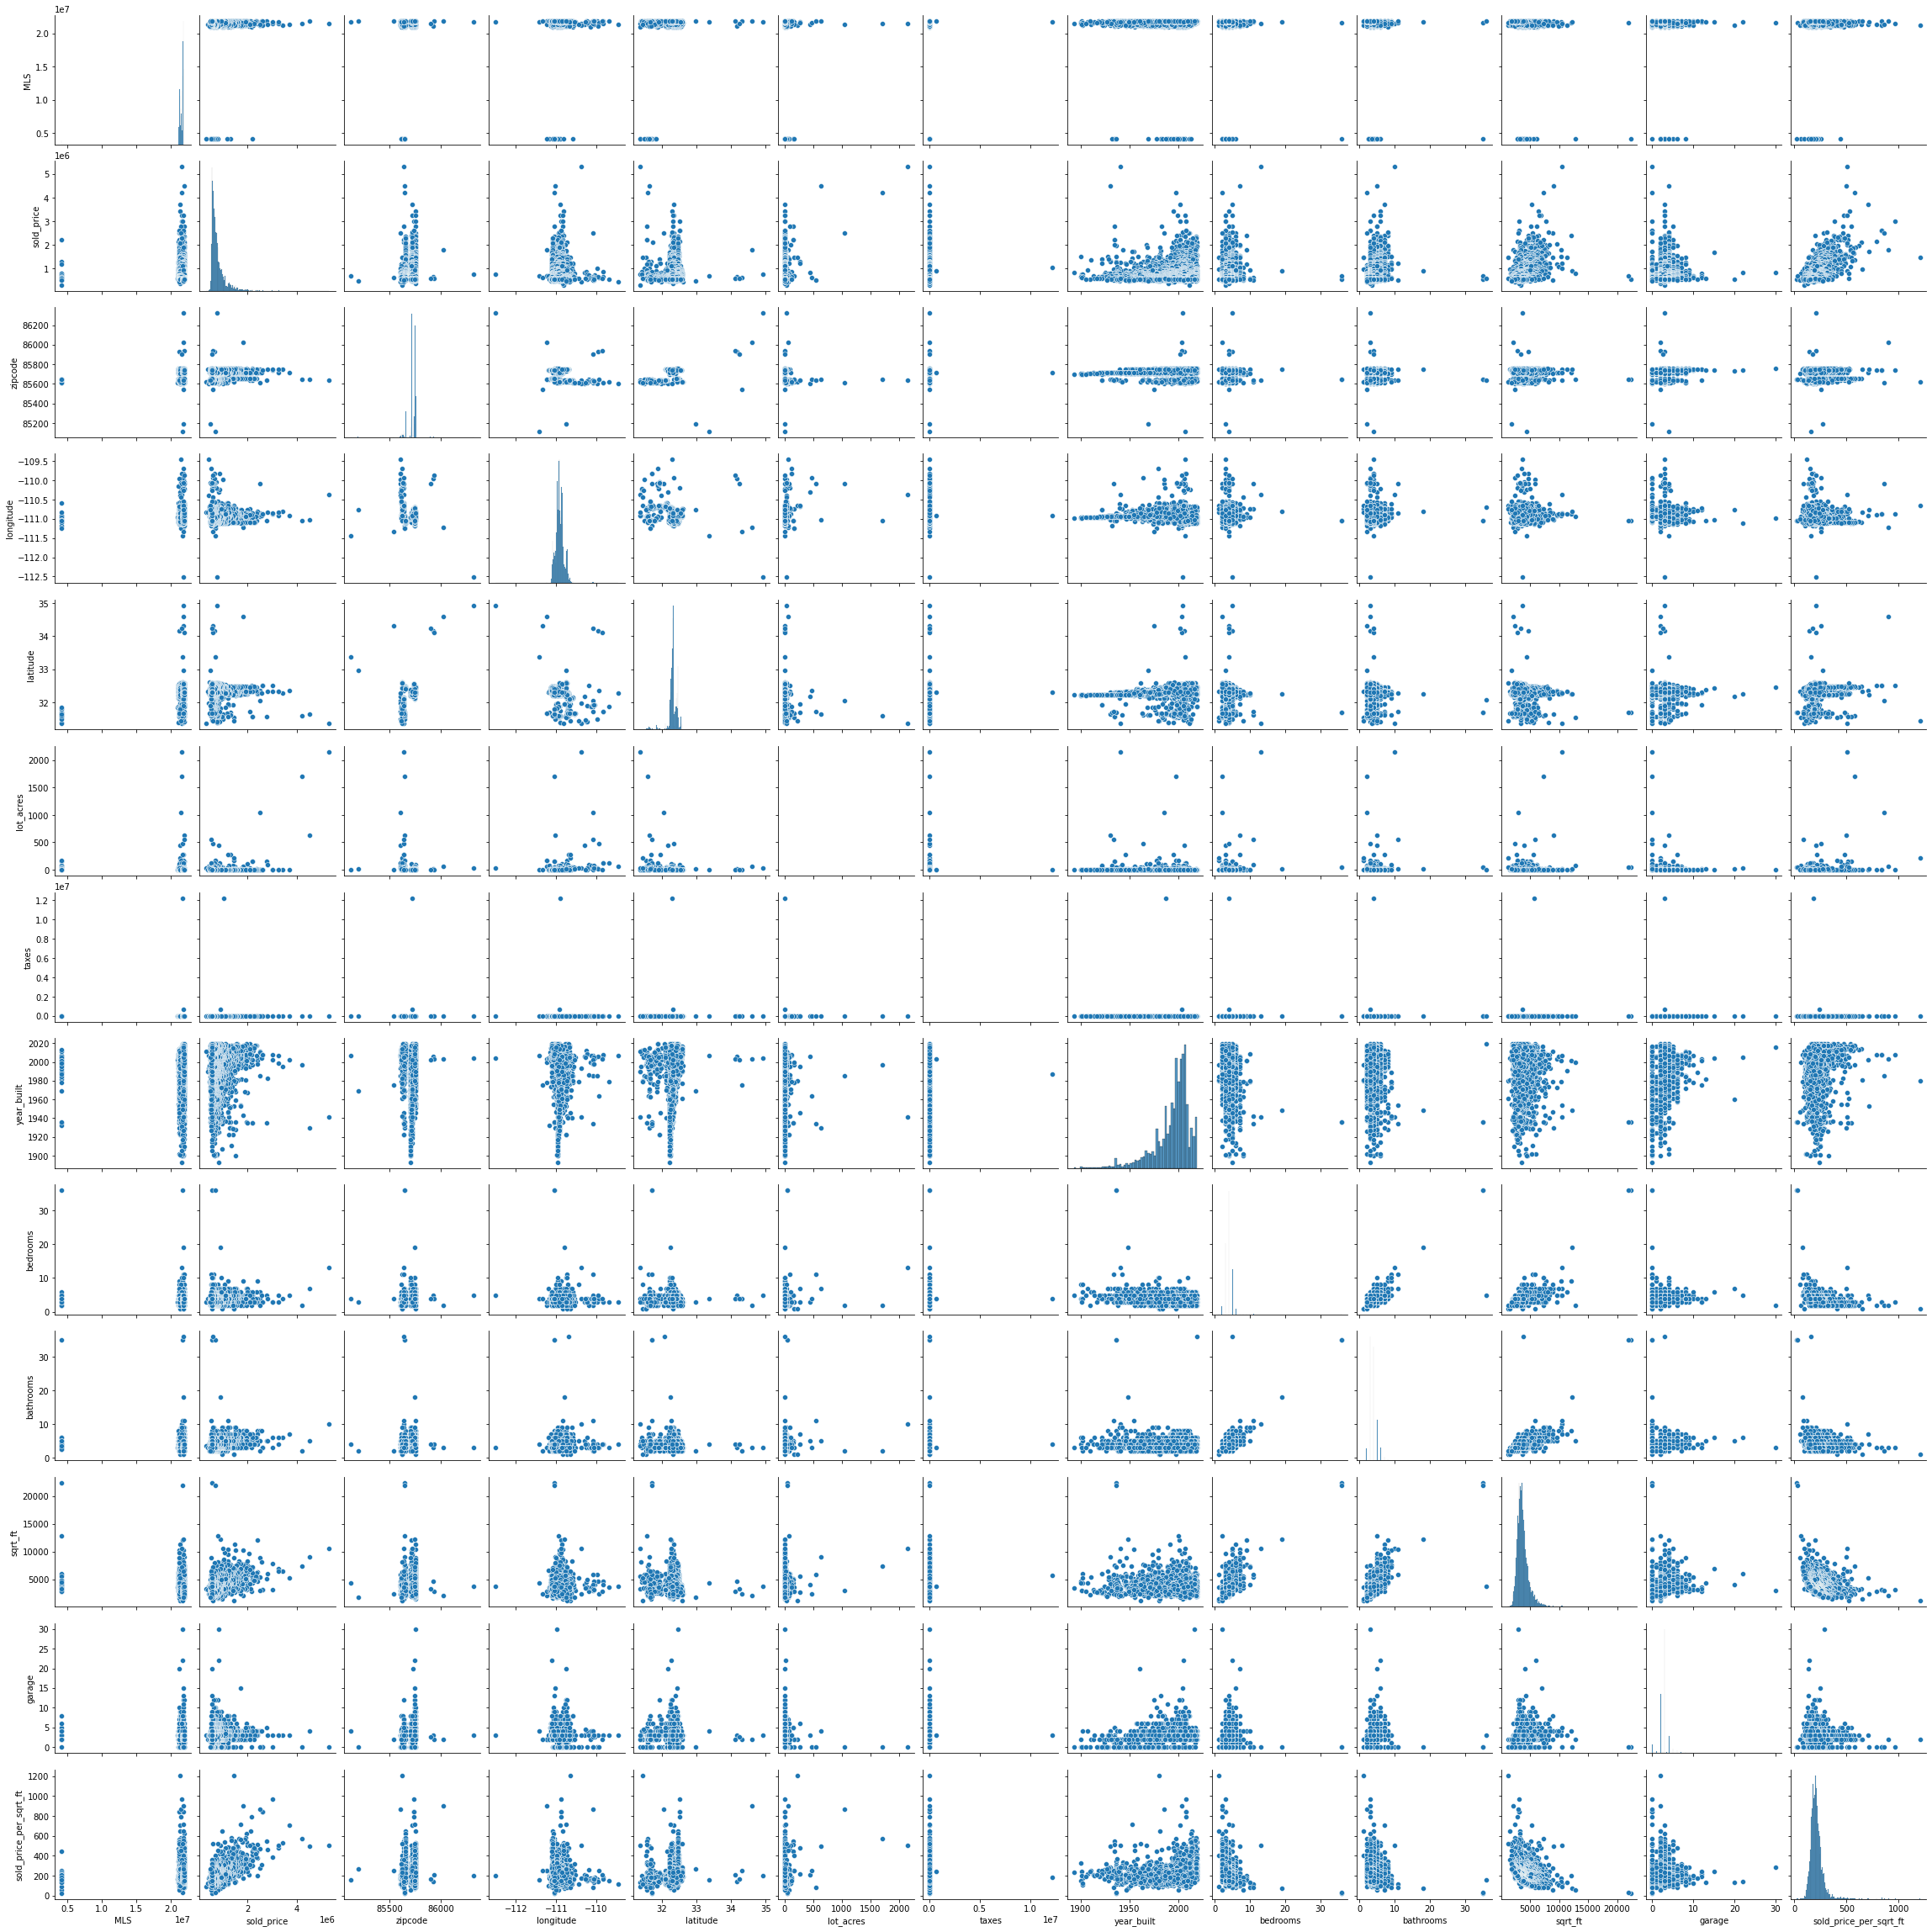

In [21]:
# Check the relationship of the features
plt.figure(figsize=(16, 12))
sns.pairplot(data2)
plt.xticks(fontsize=14, rotation=90)

Text(0.5, 1.0, 'Numeric Feature heatmap')

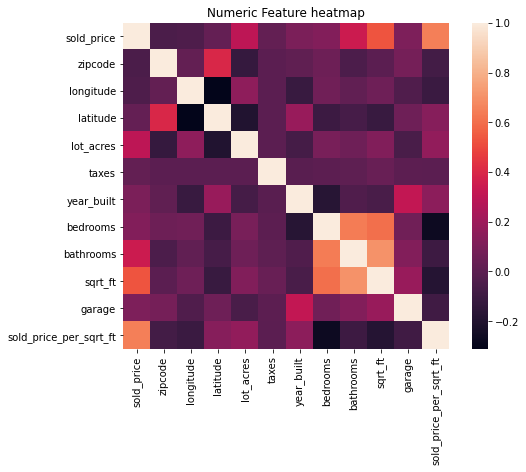

In [22]:
# To check the correlation amonge the variables
fig,ax = plt.subplots(figsize=(8,6))
correlation = data2.select_dtypes(include=['float64','int64']).iloc[:,1:].corr()
sns.heatmap(correlation,ax=ax,vmax=1,square=True)
plt.title('Numeric Feature heatmap')

In [23]:
corr_dict = correlation['sold_price'].to_dict()
del correlation['sold_price']
## descending 
## correlation with sold price
for key,val in sorted(corr_dict.items(),key=lambda x:-abs(x[1])):
    print('{0} \t : {1}' .format(key,val))

sold_price 	 : 1.0
sold_price_per_sqrt_ft 	 : 0.6467866269604795
sqrt_ft 	 : 0.5336600176503201
bathrooms 	 : 0.34869426019064986
lot_acres 	 : 0.2988167370503006
bedrooms 	 : 0.1231535509420167
garage 	 : 0.10392860678544967
year_built 	 : 0.10309148858600695
zipcode 	 : -0.05199957183627022
longitude 	 : -0.04108956724432374
latitude 	 : 0.03138841066646854
taxes 	 : 0.023605188873612928


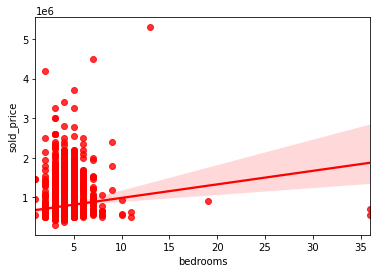

In [24]:
# plot the scatter plot between sold_price and bedrooms to find the relationship
sns.regplot(x = "bedrooms",
            y = "sold_price",
            data = data2, color = 'red')
# show the plot
plt.show()

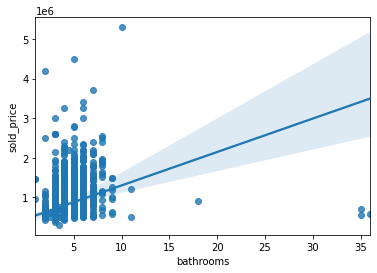

In [25]:
# plot the scatter plot between sold_price and bathrooms 
sns.regplot(x = "bathrooms",
            y = "sold_price",
            data = data2)
# show the plot
plt.show()

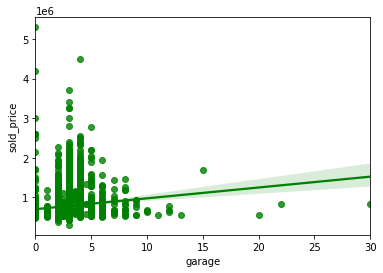

In [26]:
sns.regplot(x = "garage",
            y = "sold_price",
            data = data2, color = 'green')
# show the plot
plt.show()

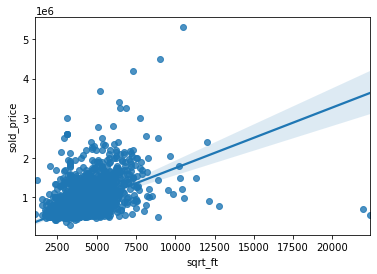

In [27]:
# plot the scatter plot between sold_price and sqrt_ft 
sns.regplot(x = "sqrt_ft",
            y = "sold_price",
            data = data2)
# show the plot
plt.show()

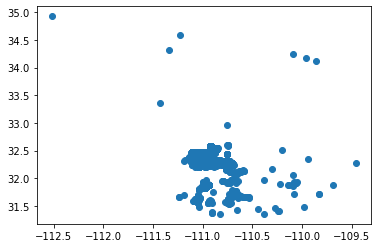

In [28]:
# scatter plot between logitude and latitude
plt.scatter(x=data2['longitude'], y=data2['latitude'])
plt.show()

In [29]:
# create the cloropleth map
map_world = folium.Map(location = [31, -110], tiles = 'stamenterrain', zoom_start = 5.5)
#  add Locations to map
for lat, lng, label in zip(data2.latitude, data2.longitude, data2.sold_price):
    folium.CircleMarker(
        [lat, lng],
        columns= ['sold_price', 'bedrooms'],
        radius=2,
        popup=label,
        fill=True,
        color='Red',
        fill_color='PuBu',
        fill_opacity=0.6
        ).add_to(map_world)

In [30]:
map_world

(array([   9.,    7.,   25.,   75.,   94.,  223.,  468.,  834., 2165.,
        1003.]),
 array([1893. , 1905.6, 1918.2, 1930.8, 1943.4, 1956. , 1968.6, 1981.2,
        1993.8, 2006.4, 2019. ]),
 <BarContainer object of 10 artists>)

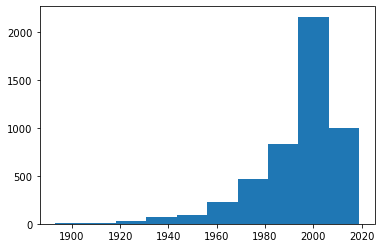

In [31]:
# Distribution of zipcode
df= data2['year_built']
plt.hist(x=df)

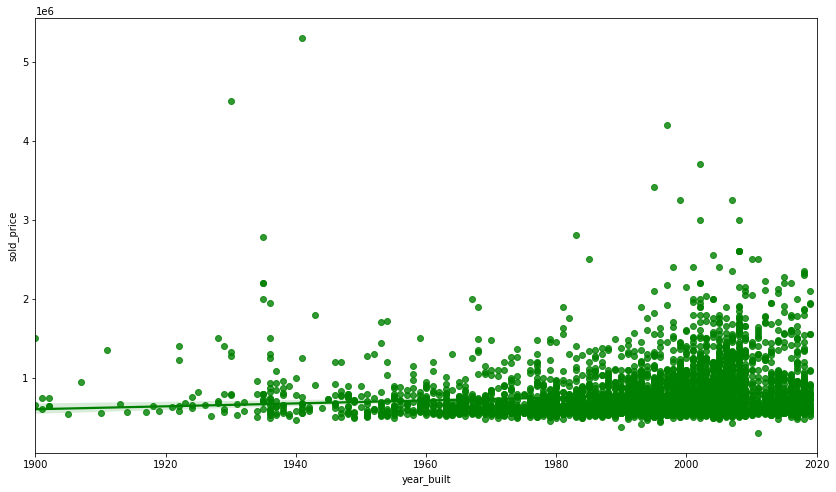

In [32]:
# correlation between sold price and year_built
plt.figure(figsize=[14,8])
plt.xlim([1900, 2020])
sns.regplot(x = "year_built",
            y = "sold_price",
            data = data2, color = 'green')

# show the plot
plt.show()

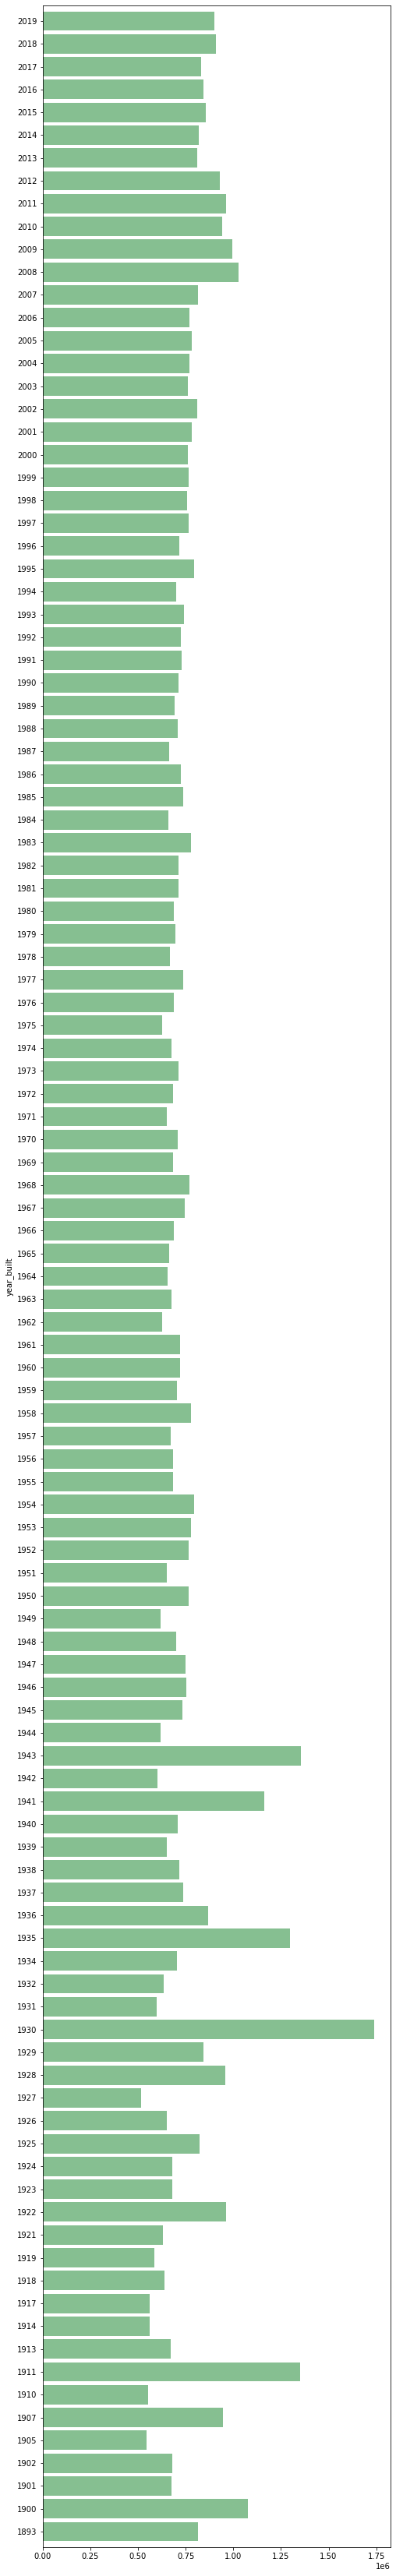

In [33]:
# bar chat between year)built and sold_price
x = data2.groupby('year_built')['sold_price'].mean()
ax = x.plot(kind='barh', figsize=(8, 60), color='#86bf91', zorder=2, width=0.85)

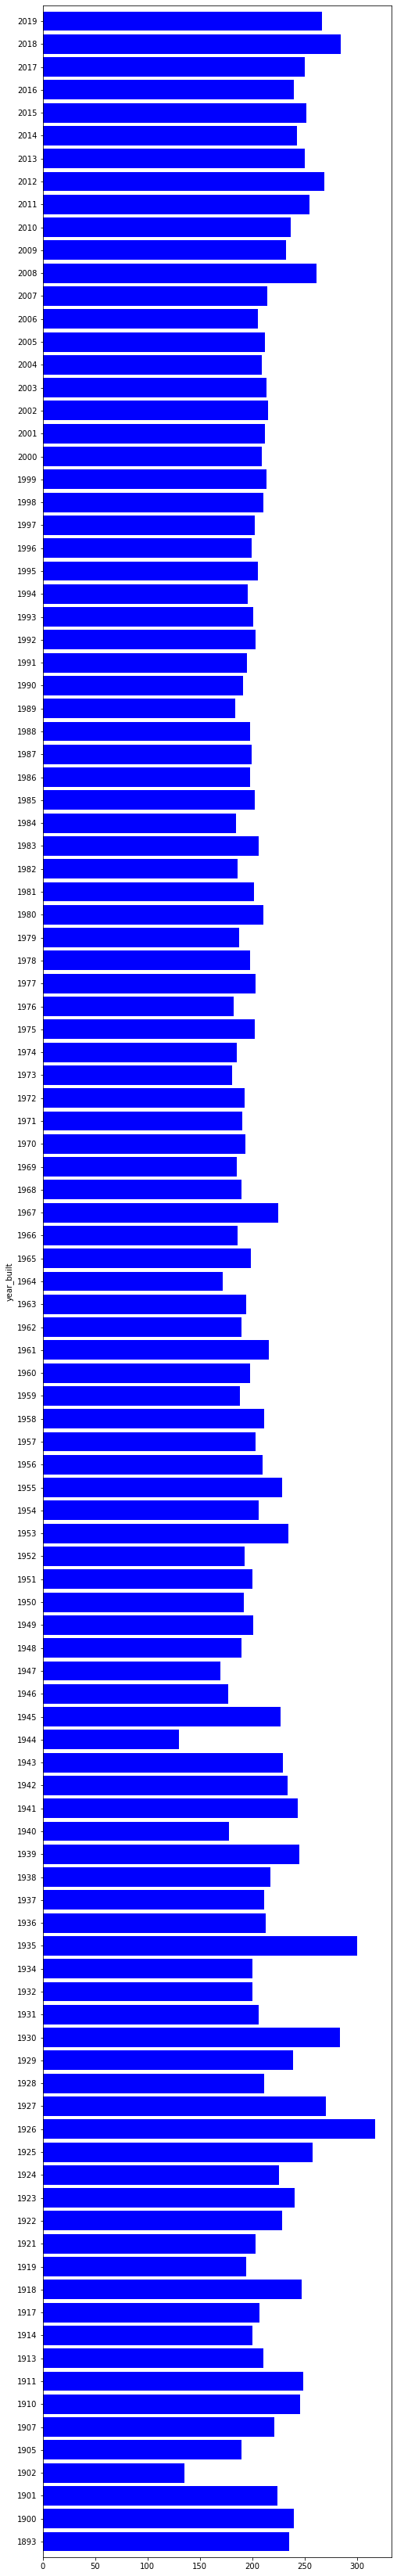

In [34]:
# bar chat between year_built and sold_price_sqrt_per_ft
x = data2.groupby('year_built')['sold_price_per_sqrt_ft'].mean()
ax = x.plot(kind='barh', figsize=(8, 60), color='blue', zorder=2, width=0.85)

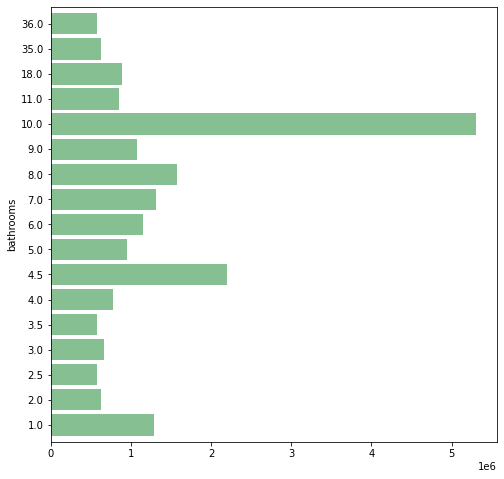

In [35]:
# # bar chat between bathroom and sold_price
x = data2.groupby('bathrooms')['sold_price'].mean()
ax = x.plot(kind='barh', figsize=(8, 8), color='#86bf91', zorder=2, width=0.85)

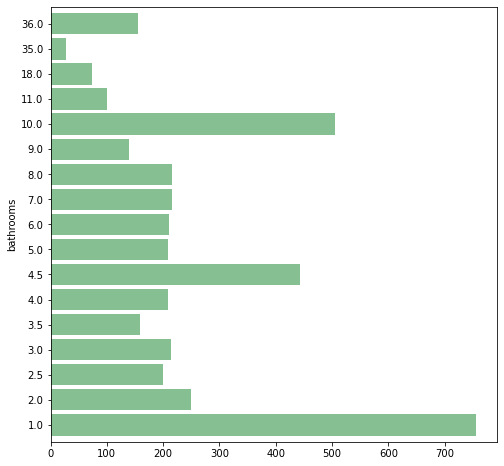

In [36]:
#  bar chat between bathroom and sold_price_per_sqrt_ft
x = data2.groupby('bathrooms')['sold_price_per_sqrt_ft'].mean()
ax = x.plot(kind='barh', figsize=(8, 8), color='#86bf91', zorder=2, width=0.85)

In [37]:
# count the number of features in kitchen
data2['comma_count'] = data2.kitchen_features.str.count(',')

In [38]:
data2.head()

MLS  sold_price  zipcode   longitude   latitude  lot_acres     taxes  \
0  21530491   5300000.0    85637 -110.378200  31.356362    2154.00   5272.00   
1  21529082   4200000.0    85646 -111.045371  31.594213    1707.00  10422.36   
3  21919321   4500000.0    85646 -111.035925  31.645878     636.67   8418.58   
4  21306357   3411450.0    85750 -110.813768  32.285162       3.21  15393.00   
5  21528016   3250000.0    85718 -110.910593  32.339090       1.67  27802.84   

   year_built  bedrooms  bathrooms  sqrt_ft  garage  \
0        1941        13       10.0  10500.0     0.0   
1        1997         2        2.0   7300.0     0.0   
3        1930         7        5.0   9019.0     4.0   
4        1995         4        6.0   6396.0     3.0   
5        1999         3        4.0   6842.0     3.0   

                                    kitchen_features fireplaces  \
0            Dishwasher, Freezer, Refrigerator, Oven          6   
1                       Dishwasher, Garbage Disposal          5   
3  Dishwasher, Double Sink, Pantry: Butler, Refri...          4   
4  Dishwasher, Garbage Disposal, Refrigerator, Mi...          5   
5  Dishwasher, Garbage Disposal, Refrigerator, Mi...          5   

                 floor_covering  HOA  sold_price_per_sqrt_ft  comma_count  
0            Mexican Tile, Wood    0              504.761905            3  
1          Natural Stone, Other    0              575.342466            1  
3  Ceramic Tile, Laminate, Wood    0              498.946668            3  
4              Carpet, Concrete   55              533.372420            4  
5    Natural Stone, Wood, Other  422              475.007308            4

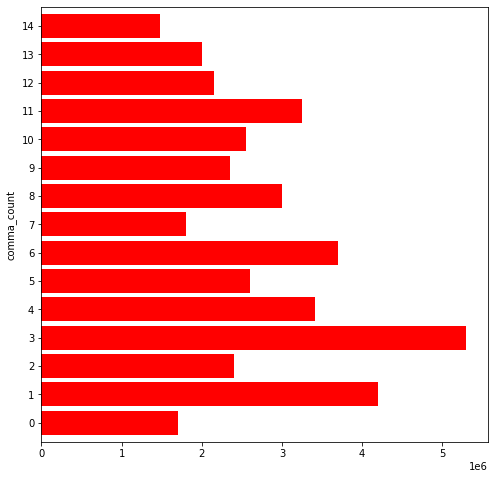

In [39]:
x = data2.groupby('comma_count')['sold_price'].max()
ax = x.plot(kind='barh', figsize=(8, 8), color='r', zorder=2, width=0.85)